In [1]:
%pylab inline
from datascience import *
import pandas as pd
import numpy as np
import os
import re

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


# Basics    :  

## These import the helper functions and lists that we want 

-term_finder(): takes a line and returns the term between the square brackets (definition)
-proper_noun_finder(): takes a line and returns the nouns for a line in a list
-speech_article_finder(): takes a line and returns the speech articles for that line in order, either only proper nouns or all.

In [2]:
def term_finder (line):
    #returns the meanings of words in a line of text
    terms = re.findall(r"(?<=\[)(.*?)(?=\])", line)
    return terms

def proper_noun_finder(line):
    #returns a list of all the proper nouns in a line of text
    nouns = re.findall(r"(?<=\:)(.*?)(?=\[)", line)
    nouns = [word for word in nouns if (len(word) > 1 and word[0].isupper() and not word[1].isupper())]
    return nouns

def speech_article_finder(line, proper_noun_filter = True):
    #returns the speech articles for proper_nouns or all words
    terms = re.findall(r"(?<=\])(.*?)(?=\s)", line)
    if proper_noun_filter:
        articles = [term for term in terms if term in proper_nouns]
    else: 
        articles = terms
    return articles

proper_nouns = {  #All Proper nouns (things marked with a [1])
'CN': 'Constellation Name (star)',
'DN': 'Deity Name',
'EN': 'Ethnicity Name',
'FN': 'Field Name',
'GN': 'Geographical Name (for regions and countries)',
'MN': 'Month Name',
'ON': 'Object Name (usually for objects associated with a god)',
'PN': 'Personal Name',
'RN': 'Royal Name',
'SN': 'Settlement Name',
'TN': 'Temple Name',
'WN': 'Water Name',
}

simple_terms = {  #All other terms that we've seen but that are not names.
'AJ': 'Adjective',
'AV': 'Adverb',
'C': 'Conjunction',
'N': 'Noun',
'NU': 'Number',
'PD': 'Part of Speech',
'V': 'Verb',
}

## Imorting your own table

Insert the full name of the table in the underline below. 

This will then capture the special terms described above and add a column of them to the table

In [21]:
text_table = Table.read_table('Enmerkar.txt', sep = ',') ### NEED FILES NAMES between folders
#read in the table

text_table = text_table.with_columns([
    'terms', text_table.apply(term_finder, 'text'), 
    'proper_nouns', text_table.apply(proper_noun_finder, 'text'), 
    'speech_articles', text_table.apply(speech_article_finder, 'text')
    ])
#clean it up with the term finders 

text_table = text_table.drop(['etcsl_no', 'text_name'])
text_table #remove the redundant information

l_no,text,terms,proper_nouns,speech_articles
1,sux:šeg₁₂[brick(work)]N sux:kur[(mountain) land]N sux:šu ...,"['brick(work)', '(mountain) land', 'shining', 'to go out ...",[],[]
2,sux:Kulaba[1]SN sux:iri[town]N sux:an[heaven]N sux:ki[pl ...,"['1', 'town', 'heaven', 'place', 'to grow']",['Kulaba'],['SN']
3,sux:Unug[1]SN sux:mu[name]N sux:tir-an-na[rainbow]N,"['1', 'name', 'rainbow']",['Unug'],['SN']
4,sux:an[heaven]N sux:us₂[to be adjacent]V sux:si-muš₃[bri ...,"['heaven', 'to be adjacent', 'brilliance', 'to be multic ...",[],[]
5,sux:an[heaven]N sux:gub[to stand]V sux:ud-sakar[crescent ...,"['heaven', 'to stand', 'crescent (moon)', 'to be new', ' ...",[],[]
6,sux:me[essence]N sux:gal[to be big]V sux:nam-nun[princel ...,"['essence', 'to be big', 'princeliness', 'to erect']",[],[]
7,sux:kur[(mountain) land]N sux:sikil[to be pure]V sux:ud[ ...,"['(mountain) land', 'to be pure', 'day(light)', 'to be g ...",[],[]
8,sux:itid[moon(light)]N sux:kalam[the Land]N sux:e₃[to go ...,"['moon(light)', 'the Land', 'to go out or in']",[],[]
9,sux:ud[day(light)]N sux:zalag[to be shining]V sux:kalam[ ...,"['day(light)', 'to be shining', 'the Land', 'horn', 'to ...",[],[]
10,sux:ab₂-ur₃[rear cow]N sux:ab₂-saharₓ[type of cow]N sux: ...,"['rear cow', 'type of cow', 'abundance', 'to go out or in']",[],[]


Create partitions to map character arcs.
These vary depending on text and might need adjustment

In [22]:
def partitioning(line_no):    #Partitioning depends on the text used.
    
    ln = int(''.join(c for c in line_no if c.isdigit()))

    if(ln <= 13):
        return "1.1"
    elif (ln <= 21):
        return "1.2"
    
    elif (ln <= 39):
        return "2.1.1"
    elif (ln <= 51):
        return "2.1.2"
    elif (ln <= 69):
        return "2.1.3"
    
    elif (ln <= 76):
        return "2.2.1"
    elif (ln <= 90):
        return "2.2.2"
    elif (ln <= 113):
        return "2.2.3"
    
    elif (ln <= 127):
        return "2.3.1"
    elif (ln <= 132):
        return "2.3.2"
    elif (ln <= 134):
        return "2.3.3"
    
    elif (ln <= 138):
        return "3.1.1"
    elif (ln <= 149):
        return "3.1.2"
    elif (ln <= 162):
        return "3.1.3"
    elif (ln <= 169):
        return "3.1.4"
    
    elif (ln <= 184):
        return "3.2.1"
    elif (ln <= 197):
        return "3.2.2"
    elif (ln <= 205):
        return "3.2.3"
    elif (ln <= 210):
        return "3.2.4"
    elif (ln <= 221):
        return "3.2.5"
    
    elif (ln <= 227):
        return "4.1"
    
    elif (ln <= 248):
        return "4.2.1"
    elif (ln <= 254):
        return "4.2.2"
    elif (ln <= 263):
        return "4.2.3"
    elif (ln <= 273):
        return "4.2.4"
    
    elif (ln <= 280):
        return "5.1"
    elif (ln <= 283):
        return "5.2"
    elif (ln <= 310):
        return "B"
    return "0"

def small_partition(line_no):
    ln = int(''.join(c for c in line_no if c.isdigit()))
    if(ln <= 13):
        return "1.1"
    elif (ln <= 21):
        return "1.2"
    elif (ln <= 69):
        return "2.1"
    elif (ln <= 113):
        return "2.2"
    elif (ln <= 134):
        return "2.3"
    elif (ln <= 169):
        return "3.1"
    elif (ln <= 221):
        return "3.2"
    elif (ln <= 227):
        return "4.1"
    elif (ln <= 273):
        return "4.2"
    elif (ln <= 280):
        return "5.1"
    elif (ln <= 283):
        return "5.2"
    elif (ln <= 310):
        return "6"
    return "0"

Classify lines by partition #, not by line #

In [23]:
text_table.append_column('section', text_table.apply(small_partition, 'l_no'))
text_graph = text_table.select(['proper_nouns', 'speech_articles', 'section']).group('section', list) 

In [24]:
def list_flattening(pn_list):  #define the list flattening function
    return [noun for nouns in pn_list for noun in nouns]

In [27]:
#flatten the lists that we're concerned with
text_graph.append_column('speech articles', text_graph.apply(list_flattening, 'speech_articles list'))
text_graph.append_column('proper nouns', text_graph.apply(list_flattening, 'proper_nouns list'))

#drop the columns we don't need
text_graph = text_graph.drop(['proper_nouns list', 'speech_articles list'])

text_graph

section,speech articles,proper nouns
1.1,"['SN', 'SN', 'SN', 'SN', 'PN', 'PN']","['Kulaba', 'Unug', 'Unug', 'Aratta', 'Ur-ŋiri-nuna', 'An ..."
1.2,"['DN', 'SN', 'PN', 'RN', 'SN', 'PN']","['Utu', 'Aratta', 'Ansiga-ria', 'Enmerkar', 'Kulaba', 'N ..."
2.1,"['SN', 'SN', 'SN', 'SN', 'SN', 'DN', 'DN', 'TN', 'SN', ' ...","['Unug', 'Kulaba', 'Aratta', 'En-suhgir-ana', 'Unug', 'I ..."
2.2,"['SN', 'SN', 'SN', 'DN', 'TN', 'SN', 'DN', 'DN', 'DN', ' ...","['Unug', 'Aratta', 'Aratta', 'Inana', 'E-zagin', 'Aratta ..."
2.3,"['RN', 'RN', 'SN', 'SN', 'SN', 'SN', 'SN', 'SN', 'RN', ' ...","['Enmerkar', 'En-suhgir-ana', 'En-suhgir-ana', 'Unug', ' ..."
3.1,"['PN', 'SN', 'SN', 'TN', 'PN', 'SN', 'SN', 'SN', 'SN', ' ...","['Hamazi', 'Ur-ŋiri-nuna', 'Hamazi', 'Hamazi', 'Aratta', ..."
3.2,"['SN', 'DN', 'DN', 'DN', 'DN', 'DN', 'DN', 'DN', 'DN', ' ...","['Ereš', 'Nisaba', 'Nisaba', 'Nisaba', 'Nisaba', 'Nisaba ..."
4.1,"['SN', 'WN', 'DN', 'DN', 'PN']","['Ereš', 'Euphrates', 'An', 'Enlil', 'Saŋburu']"
4.2,"['PN', 'PN', 'PN', 'PN', 'PN', 'PN', 'SN', 'DN', 'SN', ' ...","['Saŋburu', 'Saŋburu', 'Saŋburu', 'Saŋburu', 'Saŋburu', ..."
5.1,"['RN', 'RN', 'DN', 'DN']","['En-suhgir-ana', 'Enmerkar', 'Inana', 'Inana']"


## Sort values by their unique section 'partition' of the story

In [28]:
def partitioner (i):
    rows = []
    section = text_graph['section'][i]
    speech_articles = text_graph['speech articles'][i]
    proper_nouns = text_graph['proper nouns'][i]
    for j in range(len(speech_articles)):
        article = speech_articles[j]
        proper_noun = proper_nouns[j]
        rows.append([section, article, proper_noun])
    return rows

text_table_section = Table(['section', 'speech articles', 'proper nouns'])
for i in range(text_graph.num_rows):
    text_table_section = text_table_section.with_rows(partitioner(i))
text_table_section

section,speech articles,proper nouns
1.1,SN,Kulaba
1.1,SN,Unug
1.1,SN,Unug
1.1,SN,Aratta
1.1,PN,Ur-ŋiri-nuna
1.1,PN,Ansiga-ria
1.2,DN,Utu
1.2,SN,Aratta
1.2,PN,Ansiga-ria
1.2,RN,Enmerkar


# Optional to find most important characters

In [32]:
proper_noun_by_section = text_table_section.pivot('proper nouns', rows = 'section')
name_counts = []
for name in proper_noun_by_section.drop('section').labels:
    name_counts.append([name, np.sum(proper_noun_by_section[name])])

top_7_names = ['FILL THIS IN WITH THE TOP 7 names']
name_counts

[['An', 2],
 ['Ansiga-ria', 5],
 ['Anzud', 1],
 ['Aratta', 18],
 ['Aruru', 1],
 ['E-ana', 1],
 ['E-zagin', 4],
 ['E-ŋipar', 1],
 ['En-suhgir-ana', 9],
 ['Enlil', 7],
 ['Enmerkar', 9],
 ['Ereš', 3],
 ['Euphrates', 1],
 ['Hamazi', 3],
 ['Inana', 14],
 ['Kulaba', 5],
 ['Namena-tuma', 1],
 ['Nanna', 1],
 ['Ninlil', 1],
 ['Ninurta', 1],
 ['Nisaba', 13],
 ['Saŋburu', 8],
 ['Unug', 16],
 ['Ur-ŋiri-nuna', 2],
 ['Utu', 2],
 ['Šakkan', 1]]

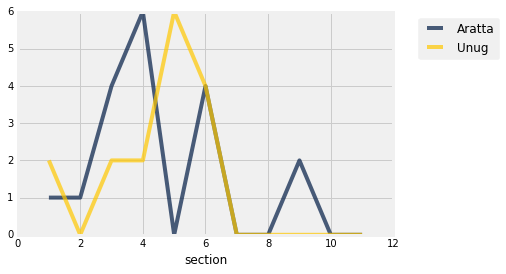

In [33]:
names_graph = proper_noun_by_section.with_column(
    'section', range(1, proper_noun_by_section.num_rows+1))

top_7_names_graph = names_graph.select(['Aratta', 'Unug', 'section']).plot('section')
#notice Aratta is the only one mentioned in the section 4.2.3

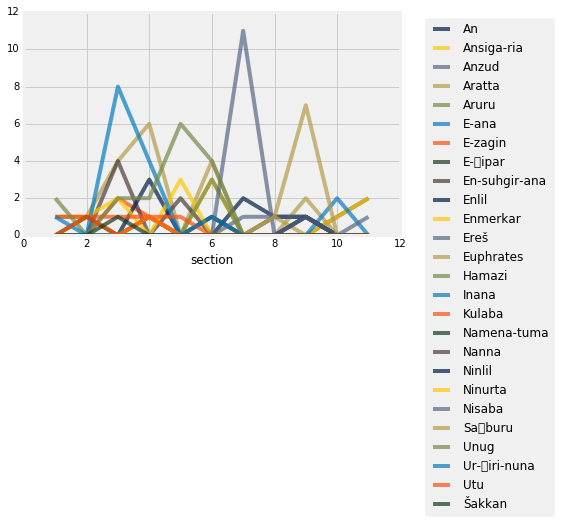

In [34]:
names_graph.plot('section') # see who is mentioned the most